In [120]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pandas as pd
import scipy.stats as stats

In [139]:
gex = pd.DataFrame.from_csv('Sanger_molecular_data/gex.csv', header=0)
methyl = pd.DataFrame.from_csv('Sanger_molecular_data/methyl/CpG_isle_level/methyl_ilse_beta.csv', header=0)
locus_gene = pd.DataFrame.from_csv('Converted_data/results.csv', header=0, index_col=False)

In [140]:
locus_gene = locus_gene.dropna()
locus_gene = locus_gene[locus_gene['grch38_gene_name'].isin(gex.index.values)].reset_index(drop=True)
locus_gene

,loci,grch38_gene_name
0,chr1:5937157-5937392,NPHP4
1,chr1:166958220-166958683,ILDR2
2,chr1:43832814-43833073,ST3GAL3
3,chr1:20960045-20960551,EIF4G3
4,chr1:1267435-1268986,UBE2J2
5,chr1:223566642-223567268,CAPN8
6,chr1:57887963-57890637,DAB1
7,chr1:151319326-151319545,PI4KB
8,chr1:10757891-10758252,CASZ1
9,chr1:12600347-12600556,DHRS3


In [141]:
locus_gene.shape

(12372, 2)

In [142]:
gex.shape

(17419, 83)

In [143]:
methyl.shape

(26313, 82)

No gene expression available for the cell lines **MDA-MB-175-VII** and **NCI-H1437**. <br>
No methylation available for the cell lines **SW620**, **KMS-11** and **MDA-MB-175-VII**

In [144]:
gex.drop(['SW620', 'KMS-11'], axis=1, inplace=True)
methyl.drop('NCI-H1437', axis=1, inplace=True)

In [145]:
methyl.shape

(26313, 81)

In [146]:
gex.shape

(17419, 81)

In [147]:
methyl=methyl[gex.columns]

In [148]:
methyl

,22RV1,647-V,A549,BFTC-905,BT-20,BT-474,BT-549,C32,CAL-120,CAL-148,...,SW837,SW900,SW948,T-24,T47D,TCCSUP,UACC-812,UM-UC-3,VCaP,VM-CUB-1
chr1:91190489-91192804,0.721448,0.794850,0.757174,0.670391,0.776307,0.595175,0.631357,0.818692,0.708360,0.636477,...,0.777035,0.838035,0.693786,0.772520,0.644643,0.584588,0.821878,0.761377,0.634385,0.752399
chr1:230561103-230562702,0.548634,0.438499,0.379540,0.397155,0.599632,0.560515,0.487595,0.529199,0.503532,0.473723,...,0.352446,0.551876,0.309111,0.415686,0.377423,0.319003,0.532013,0.422074,0.352268,0.654325
chr1:5937157-5937392,0.855258,0.882623,0.865125,0.833689,0.799932,0.829530,0.867833,0.829281,0.863972,0.841697,...,0.827683,0.843012,0.876330,0.871788,0.891672,0.912338,0.847513,0.815598,0.824353,0.873546
chr1:166958220-166958683,0.735134,0.843234,0.755530,0.821604,0.511313,0.817331,0.815781,0.706106,0.815127,0.846426,...,0.835246,0.866354,0.769079,0.763839,0.670178,0.662619,0.811266,0.666448,0.863199,0.774044
chr1:43832814-43833073,0.373835,0.342766,0.274094,0.291829,0.266673,0.340050,0.344933,0.334399,0.279333,0.340005,...,0.285086,0.295572,0.356639,0.392305,0.352019,0.391685,0.276487,0.293689,0.374557,0.326064
chr1:200011400-200012055,0.832400,0.495852,0.418070,0.844214,0.840651,0.459881,0.487692,0.574676,0.354246,0.614351,...,0.363782,0.545619,0.359223,0.834020,0.328477,0.529213,0.392362,0.566266,0.552753,0.727500
chr1:20960045-20960551,0.393890,0.332474,0.413893,0.363311,0.281845,0.382806,0.321202,0.338454,0.353092,0.352917,...,0.327443,0.342893,0.331911,0.348881,0.330734,0.389571,0.362439,0.342247,0.307868,0.335797
chr1:1267435-1268986,0.579922,0.871158,0.849732,0.730204,0.762947,0.813393,0.618156,0.788437,0.823841,0.822300,...,0.677910,0.720069,0.588203,0.621413,0.872530,0.753287,0.775234,0.801901,0.821590,0.501657
chr1:169396621-169396869,0.838916,0.387694,0.628627,0.687007,0.769415,0.866743,0.824505,0.382242,0.863825,0.867138,...,0.841688,0.377850,0.796066,0.677602,0.693408,0.335319,0.876255,0.304483,0.801445,0.896669
chr1:223566642-223567268,0.270527,0.444124,0.614625,0.442436,0.703009,0.545878,0.592376,0.588857,0.739937,0.549718,...,0.637584,0.557554,0.432284,0.364709,0.518033,0.305687,0.525836,0.430932,0.649721,0.432044


In [207]:
corr = []
all_x = []
all_y = []
for i in range(locus_gene.shape[0]): 
    x = methyl.ix[locus_gene.iloc[i]['loci']] # methylation values for each cell line (per index gene)
    y = gex.ix[locus_gene.ix[i]['grch38_gene_name']] # gene expr values for each cell line
    corr.append(np.asarray(stats.pearsonr(x, y))) # pearson correlation for that gene
    all_x.append(np.asarray(x))
    all_y.append(np.asarray(y))
all_x = np.array(all_x)
all_y = np.array(all_y)

mean_pearson = np.array(corr)[:, 0].mean()
mean_pval = np.array(corr)[:, 1].mean()
mean_x = np.mean(all_x, axis=1) # average methylation per gene
mean_y = np.mean(all_y, axis=1) # average gene expr per gene

In [208]:
mean_pearson

-0.023369995351588138

In [209]:
mean_pval

0.3816794831323666

In [210]:
stats.pearsonr(mean_x, mean_y)

(-0.021050541271378904, 0.019208284978574439)

[]

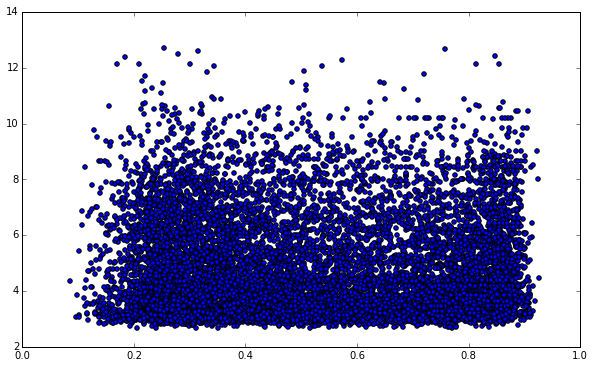

In [211]:
plt.scatter(mean_x, mean_y)
plt.plot()